In [103]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scraping all reports and Insights

In [29]:
# Scraping all reports
report_base = 'https://www.jpmorganchase.com/corporate/institute/research'
report_response = requests.get(report_base)
report_page = BeautifulSoup(report_response.text, 'html.parser')
reports = report_page.find_all(class_='globalphilsect')

report_dates = []
report_titles = []
report_subtitles = []
report_abstracts = []

for i in reports:
    report_dates.append(i.find(class_="lead-in").text)
    report_titles.append(i.find('h2',class_="report").text)
    subtitle = i.find('h3',class_="report")
    if subtitle == None:
        report_subtitles.append(None)
    else:
        report_subtitles.append(subtitle.text)
    report_abstracts.append(i.find(class_="lead-in").find_next().text)

report_df = pd.DataFrame({'date':report_dates,'title':report_titles,
                   'subtitle':report_subtitles, 'abstract':report_abstracts})
report_df['year'] = pd.to_datetime(report_df.date).dt.year
report_df['month'] = pd.to_datetime(report_df.date).dt.month
report_df['type'] = 'report'
report_df.to_csv('jpmchase_report.csv', index=False)

In [30]:
# Scraping all insights
insight_base = 'https://www.jpmorganchase.com/corporate/institute/institute-insights'
insight_response = requests.get(insight_base)
insight_page = BeautifulSoup(insight_response.text, 'html.parser')
insights = insight_page.find_all(class_='match-height-apply')

insight_dates = []
insight_titles = []

for i in insights:
    insight_titles.append(i.find('h4').text)
    insight_dates.append(i.find('p').text)

insight_df = pd.DataFrame({'date':insight_dates,'title':insight_titles})
insight_df['year'] = pd.to_datetime(insight_df.date).dt.year
insight_df['month'] = pd.to_datetime(insight_df.date).dt.month
insight_df['day'] = pd.to_datetime(insight_df.date).dt.day
insight_df['weekday'] = pd.to_datetime(insight_df.date).dt.weekday
insight_df['type'] = 'insight'
insight_df.to_csv('jpmchase_insight.csv', index=False)

# Temporal Pattern Data Visualization

In [37]:
all_df = insight_df.append(report_df)

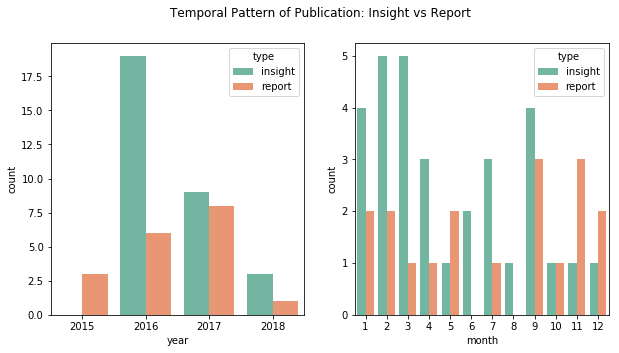

In [139]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x="year", hue="type", data=all_df, palette="Set2", ax=ax[0])
sns.countplot(x="month", hue="type", data=all_df, palette="Set2",ax=ax[1])
fig.suptitle("Temporal Pattern of Publication: Insight vs Report")
fig.savefig("Insight_Report.png")

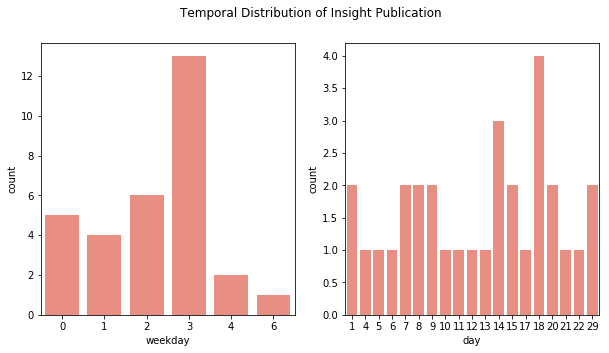

In [142]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x="weekday", data=insight_df,color = "salmon",ax=ax[0])
sns.countplot(x="day", data=insight_df,color = "salmon", ax=ax[1])
fig.suptitle("Temporal Distribution of Insight Publication")
fig.savefig("Insight.png")

# World Cloud Visualization

In [144]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stop = ['report','JPMorgan','Chase','Institute','US','percent','year']
for i in stop:
    STOPWORDS.add(i)

In [145]:
report_titles_str = ' '.join(report_titles)
insight_titles_str = ' '.join(insight_titles)
report_subtitles_str = ' '.join([x for x in report_subtitles if x is not None])
report_abstracts_str = ' '.join(report_abstracts)
all_str = report_titles_str + report_subtitles_str + report_abstracts_str + insight_titles_str

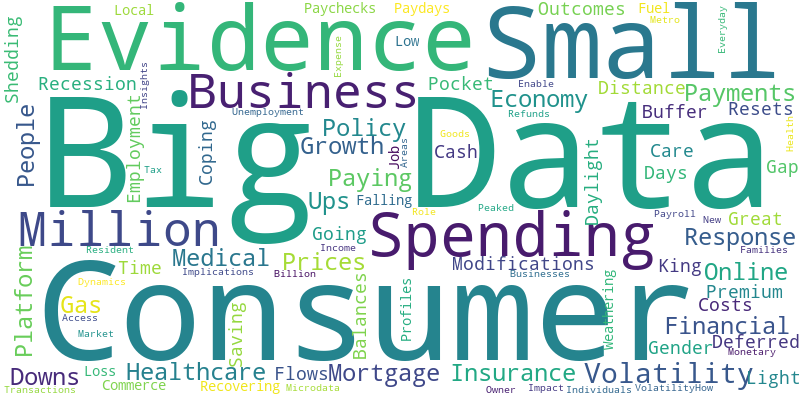

In [154]:
WordCloud(stopwords=STOPWORDS,
          background_color='white',
          scale=2).generate(report_titles_str+report_subtitles_str
                           ).to_file('jpmchase_wordcloud_report_title.png').to_image()

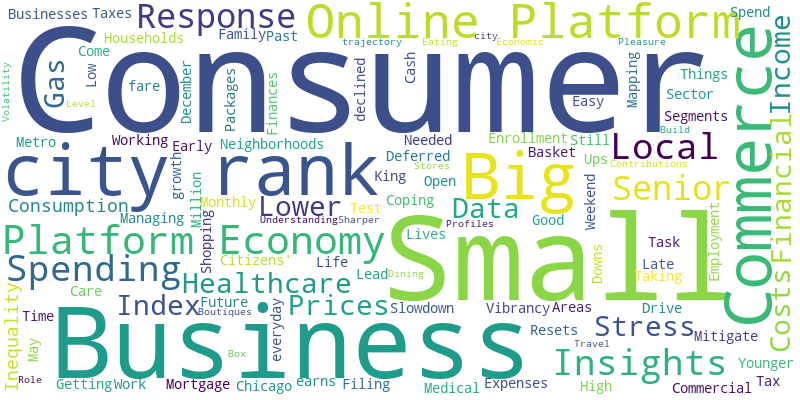

In [155]:
WordCloud(stopwords=STOPWORDS,
          background_color='white',
          scale=2).generate(insight_titles_str
                           ).to_file('jpmchase_wordcloud_insight.png').to_image()

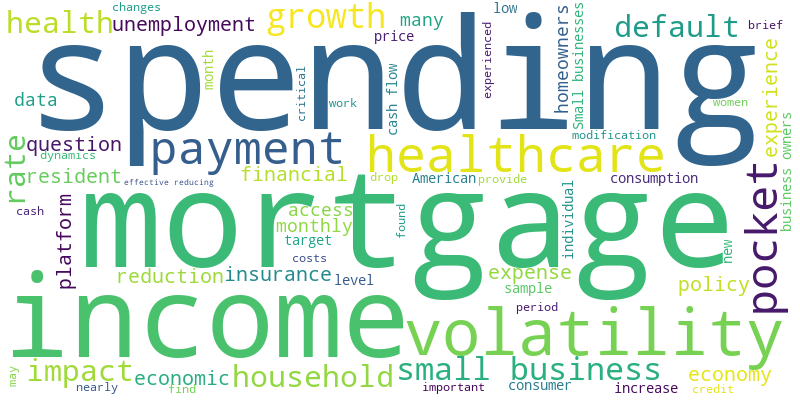

In [156]:
WordCloud(stopwords=STOPWORDS,
          background_color='white',
          scale=2).generate(report_abstracts_str
                           ).to_file('jpmchase_wordcloud_report_abstract.png').to_image()